# Análisis del dataset de AIRBNB 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
air =pd.read_excel('/kaggle/input/airbnb/NYC.xlsx')

## 1.	Graficar por municipio el número de habitaciones de cada tipo

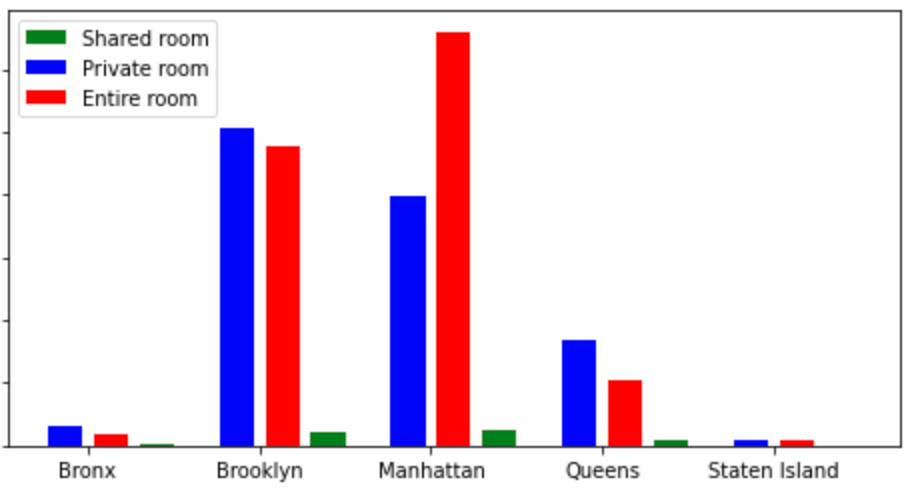

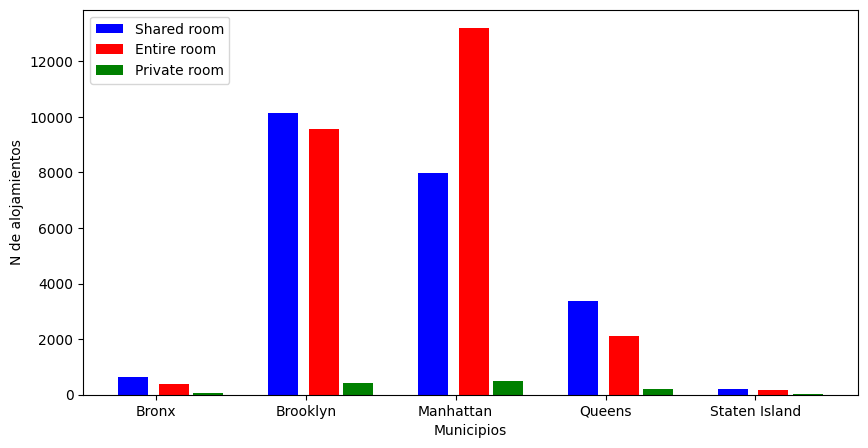

In [22]:
air.head()
# Obtener los valores únicos de la columna 'municipio'
municipios = sorted(air.municipio.unique())
sha= air[air.room_type=='Shared room'].municipio.value_counts()[municipios].tolist()
ent= air[air.room_type=='Entire home/apt'].municipio.value_counts()[municipios].tolist()
pri= air[air.room_type=='Private room'].municipio.value_counts()[municipios].tolist()

x= range(len(municipios))

plt.figure(figsize=(10, 5))
plt.bar([i-0.15 for i in x], pri, width=0.2, color ='blue', label='Shared room')
plt.bar([i+0.12 for i in x], ent, width=0.2, color ='red', label='Entire room')
plt.bar([i+0.35 for i in x], sha, width=0.2, color = 'green', label='Private room')

plt.xticks(x, municipios)
plt.xlabel('Municipios')
plt.ylabel('N de alojamientos')
plt.legend(loc='upper left')

plt.show()

## 2.	Graficar por municipio el número de reviews

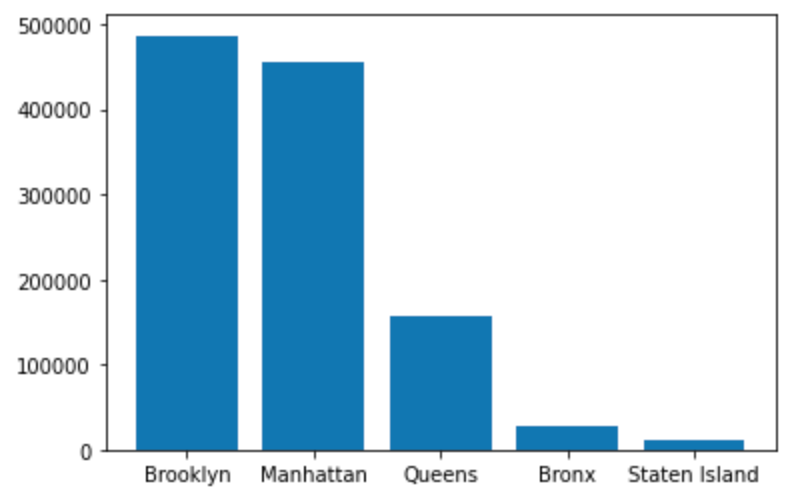

In [27]:
air.head()
airny= pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airny.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


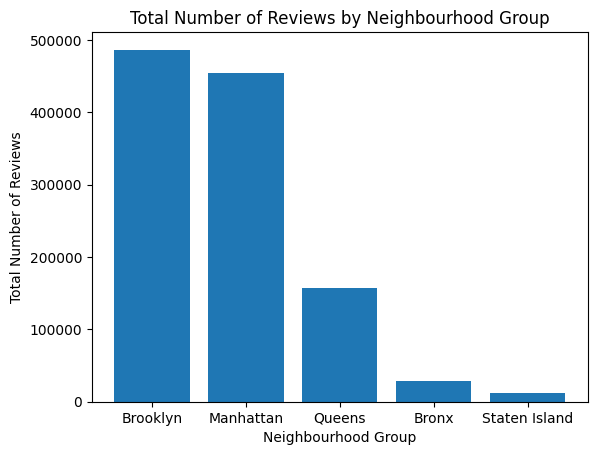

In [46]:
munis= airny.neighbourhood_group.unique()
dicti={}
for muni in munis:
    dicti[muni]= airny[airny.neighbourhood_group == muni].number_of_reviews.sum()

dicti_sort = dict(sorted(dicti.items(), key=lambda item: item[1], reverse=True))
plt.bar(dicti_sort.keys(), dicti_sort.values(), width=0.8)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood Group')
plt.show()


## 3.	Graficar el número de habitaciones individuales, casa/ dep completo y compartido de cada municipio.

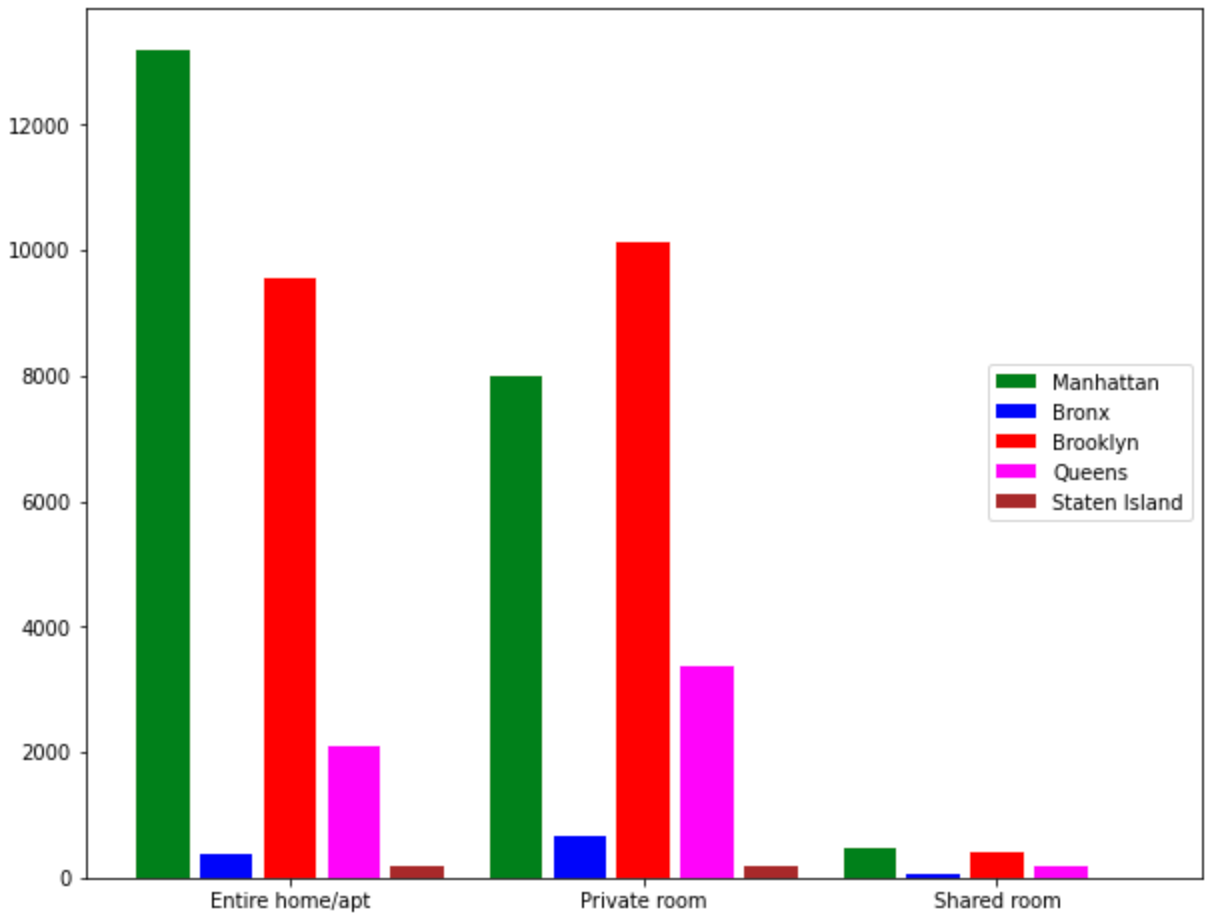

In [47]:
air.head()

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt


In [153]:
data=air.groupby(['room_type','municipio']).size().unstack()
#data = air.groupby(['room_type', 'municipio']).size().unstack(fill_value=0)

orden_municipios = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
data =data.reindex(orden_municipios, axis=1)
data

municipio,Manhattan,Bronx,Brooklyn,Queens,Staten Island
room_type,,,,,
Entire home/apt,13199,379,9559,2096,176
Private room,7982,652,10132,3372,188
Shared room,480,60,413,198,9


<Figure size 1000x800 with 0 Axes>

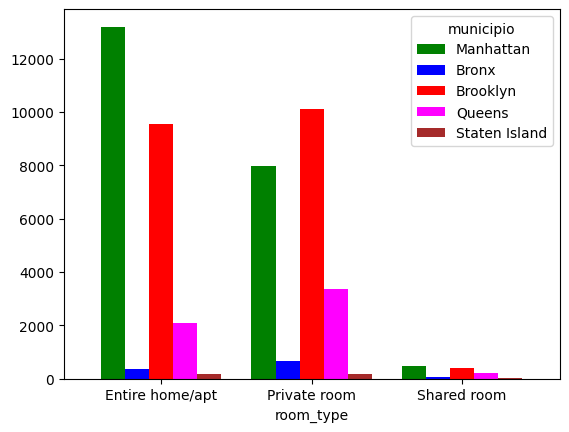

In [157]:
plt.figure(figsize=(10,8))
colors= ['green', 'blue','red','magenta', 'brown']
data.plot(kind='bar', color=colors, width=0.8)
plt.xticks(rotation=0)
plt.show()

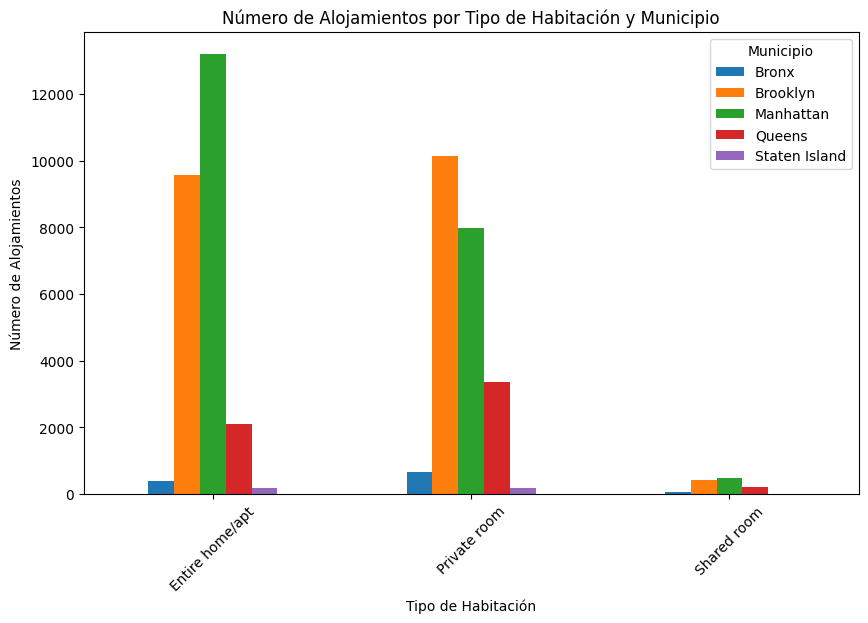

In [69]:
import matplotlib.pyplot as plt

# Agrupar por 'room_type' y 'municipio' y contar el número de alojamientos
data = air.groupby(['room_type', 'municipio']).size().unstack()

# Graficar
data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Alojamientos')
plt.title('Número de Alojamientos por Tipo de Habitación y Municipio')
plt.legend(title='Municipio', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


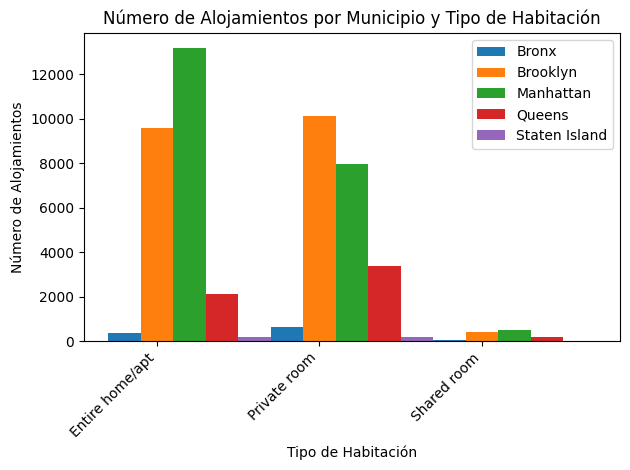

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos
data = pd.DataFrame(air.groupby(['room_type', 'municipio']).size(), columns=['count'])

# Restablecer el índice para que 'room_type' y 'municipio' sean columnas
data.reset_index(inplace=True)

# Crear una lista de municipios únicos
municipios = data['municipio'].unique()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Definir el ancho de las barras
bar_width = 0.2

# Iterar sobre los municipios únicos y graficar los datos correspondientes
for i, municipio in enumerate(municipios):
    subset = data[data['municipio'] == municipio]
    x = [j + i * bar_width for j in range(len(subset['room_type']))]
    ax.bar(x, subset['count'], width=bar_width, label=municipio)

# Establecer etiquetas y título
plt.ylabel('Número de Alojamientos')
plt.xlabel('Tipo de Habitación')
plt.title('Número de Alojamientos por Municipio y Tipo de Habitación')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks([r + bar_width for r in range(len(data['room_type'].unique()))], data['room_type'].unique(), rotation=45, ha='right')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


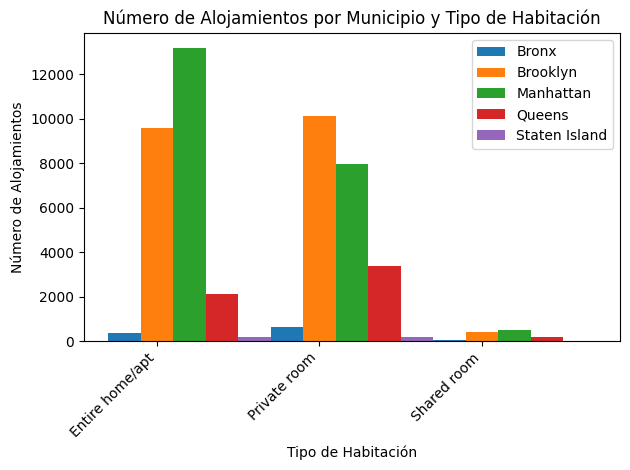

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos agrupados por 'room_type' y 'municipio'
data = pd.DataFrame(air.groupby(['room_type', 'municipio']).size(), columns=['count'])

# Restablecer el índice para que 'room_type' y 'municipio' sean columnas
data.reset_index(inplace=True)

# Crear una lista de municipios únicos
municipios = data['municipio'].unique()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Definir el ancho de las barras
bar_width = 0.2

# Iterar sobre los municipios únicos y graficar los datos correspondientes
for i, municipio in enumerate(municipios):
    subset = data[data['municipio'] == municipio]
    x = [j + i * bar_width for j in range(len(subset['room_type']))]
    ax.bar(x, subset['count'], width=bar_width, label=municipio)

# Establecer etiquetas y título
plt.ylabel('Número de Alojamientos')
plt.xlabel('Tipo de Habitación')
plt.title('Número de Alojamientos por Municipio y Tipo de Habitación')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks([r + bar_width for r in range(len(data['room_type'].unique()))], data['room_type'].unique(), rotation=45, ha='right')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


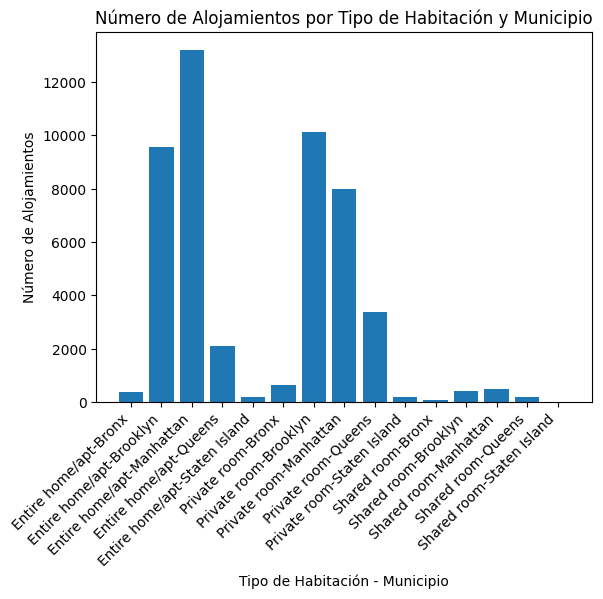

In [122]:
import matplotlib.pyplot as plt

# Crear el DataFrame data
data = pd.DataFrame(air.groupby(['room_type', 'municipio']).size(), columns=['count'])

# Obtener los índices multinivel para el eje x
xaxis= air.room_type.unique()
x = [f"{room}-{municipio}" for room, municipio in data.index]

# Obtener los valores de la columna 'count' para el eje y
y = data['count'].values

# Crear el gráfico de barras
plt.bar(x, y)

# Configurar etiquetas y título
plt.xlabel('Tipo de Habitación - Municipio')
plt.ylabel('Número de Alojamientos')
plt.title('Número de Alojamientos por Tipo de Habitación y Municipio')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


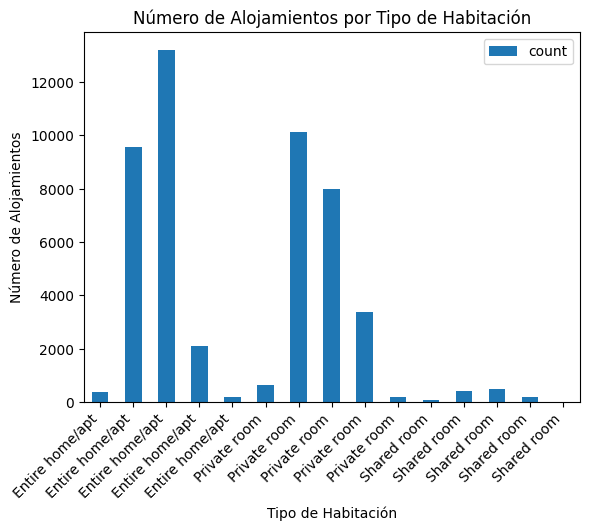

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame data
data = pd.DataFrame(air.groupby(['room_type', 'municipio']).size(), columns=['count'])

# Resetear los índices para poder manipularlos más fácilmente
data.reset_index(inplace=True)

# Filtrar solo los tipos de habitaciones únicos
tipos_habitaciones = data['room_type'].unique()

# Crear un subconjunto de datos solo para los tipos de habitaciones únicos
data_subconjunto = data[data['room_type'].isin(tipos_habitaciones)]

# Usar el método plot del DataFrame para crear el gráfico de barras
data_subconjunto.plot(kind='bar', x='room_type', y='count')

# Configurar etiquetas y título
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Alojamientos')
plt.title('Número de Alojamientos por Tipo de Habitación')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


<Figure size 1000x600 with 0 Axes>

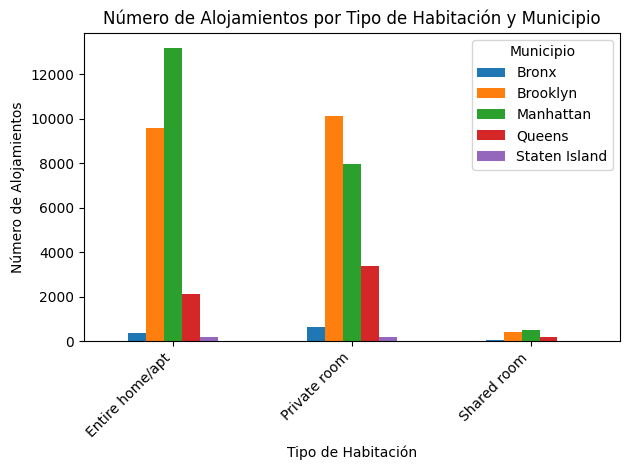

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Realizar el agrupamiento por tipo de habitación y municipio, y contar el número de alojamientos
data = air.groupby(['room_type', 'municipio']).size().unstack(fill_value=0)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=False)

# Configurar etiquetas y título
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Alojamientos')
plt.title('Número de Alojamientos por Tipo de Habitación y Municipio')
plt.legend(title='Municipio')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## 4.	Graficar la cantidad de reviews de cada municipio de acuerdo a tipo de habitación

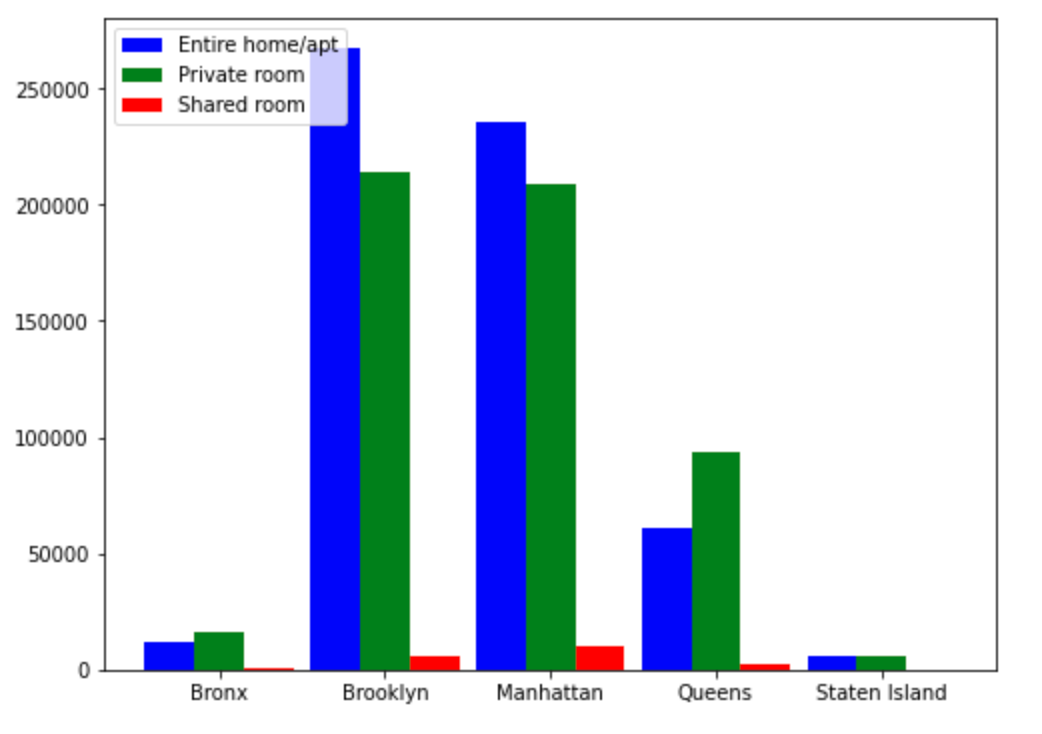

In [158]:
airny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [169]:
datas= airny.groupby(['neighbourhood_group','room_type']).number_of_reviews.sum().unstack()
datas

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


<Axes: xlabel='neighbourhood_group'>

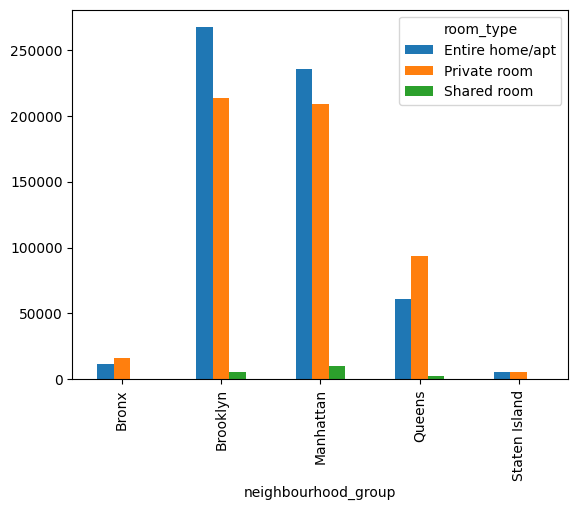

In [171]:
datas.plot(kind='bar')

## 5.	Graficar en un diagrama de caja el precio por habitación de cada municipio

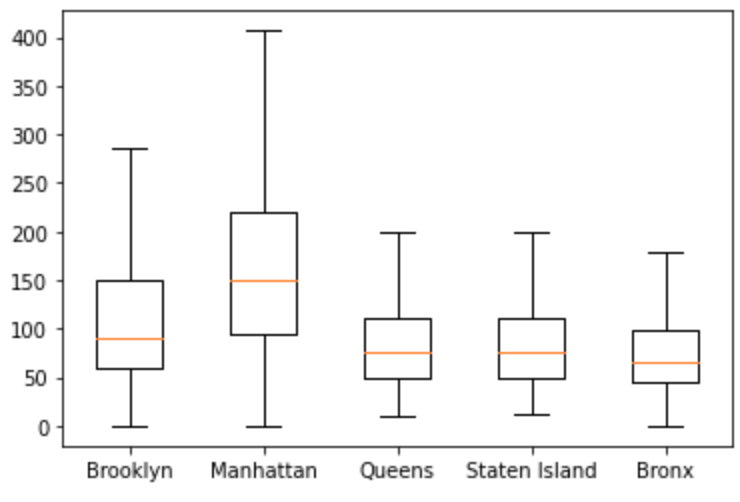

In [188]:
airny.head()
airny.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

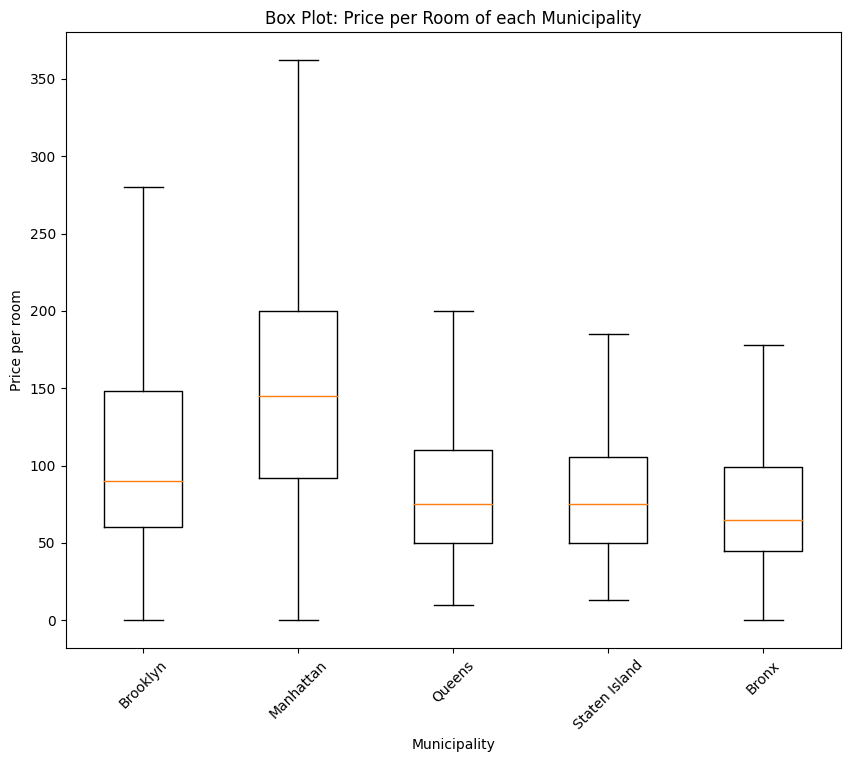

In [191]:
das= airny[['neighbourhood_group', 'price']]
munis= das.neighbourhood_group.unique()
preciosxmuni =[]
for muni in munis:
    res = das[(das['neighbourhood_group']== muni) & (das['price']<=500)]['price']
    preciosxmuni.append(res)
plt.figure(figsize=(10,8))
plt.boxplot(preciosxmuni, labels=munis, showfliers=False)
plt.xlabel('Municipality')
plt.ylabel('Price per room')
plt.title('Box Plot: Price per Room of each Municipality')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

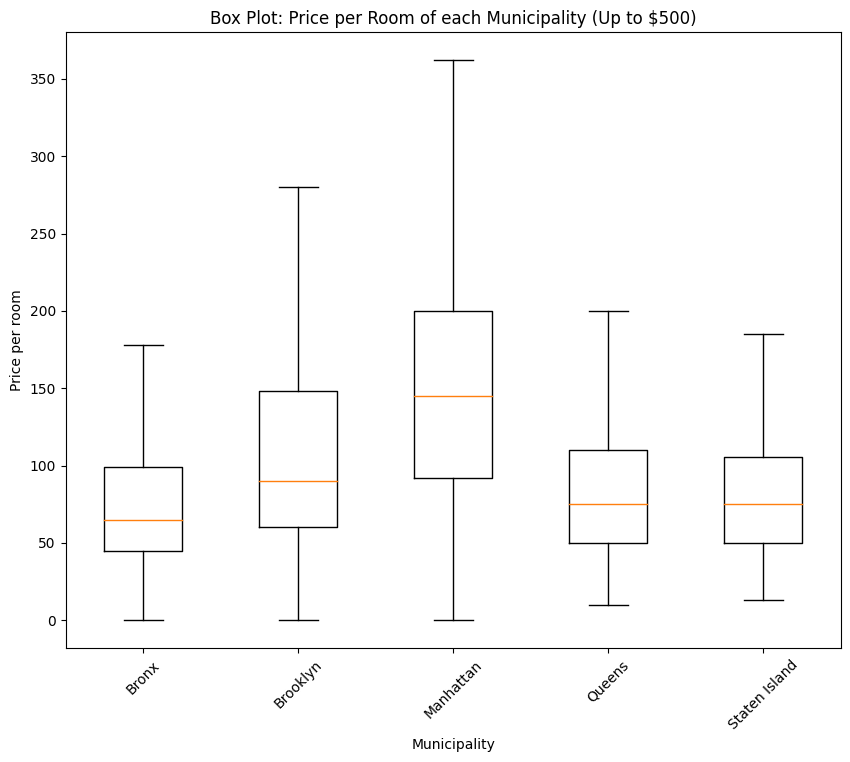

In [197]:
# Calcular los precios por habitación para cada municipio
preciosxmuni = airny.groupby('neighbourhood_group')['price'].apply(lambda x: x[x <= 500].values)

# Graficar los boxplots
plt.figure(figsize=(10,8))
plt.boxplot(preciosxmuni, labels=preciosxmuni.index, showfliers=False)
plt.xlabel('Municipality')
plt.ylabel('Price per room')
plt.title('Box Plot: Price per Room of each Municipality (Up to $500)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


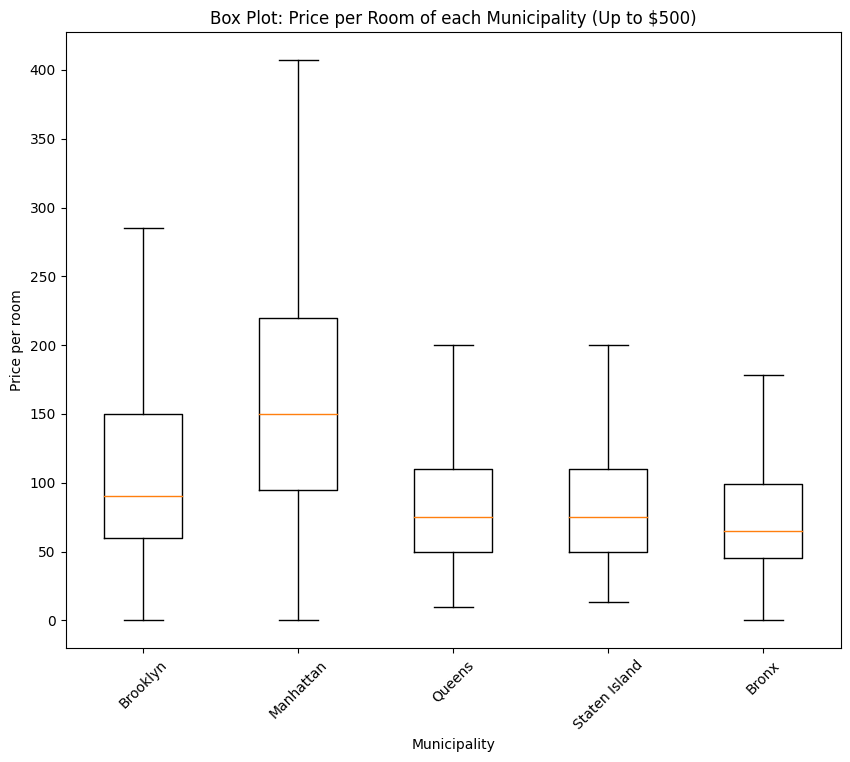

In [199]:
# Definir el orden deseado de los municipios
orden_municipios = [ 'Brooklyn','Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Crear una lista vacía para almacenar los precios por habitación para cada municipio en el orden deseado
preciosxmuni_ordenados = []

# Iterar sobre el orden deseado de los municipios
for muni in orden_municipios:
    # Seleccionar los precios por habitación para el municipio actual y añadirlos a la lista
    precios_muni = airny.loc[airny['neighbourhood_group'] == muni, 'price']
    preciosxmuni_ordenados.append(precios_muni)

# Graficar los boxplots con el orden deseado de los municipios
plt.figure(figsize=(10,8))
plt.boxplot(preciosxmuni_ordenados, labels=orden_municipios, showfliers=False)
plt.xlabel('Municipality')
plt.ylabel('Price per room')
plt.title('Box Plot: Price per Room of each Municipality (Up to $500)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()
